![](brain.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plot

# Introduction (rapide) au machine learning

Avant de foncer bille en tête dans le premier sujet de cette seconde saison du Codeur Confiné, dédiée au machine learning, une brève introduction pour mieux définir ce qu'est le machine learning.

Tom M. Mitchell en a donné une définition plutôt formelle : 

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.

C'est joli, mais ça n'explique pas grand chose :)

En deux mots : étant donné une opération à accomplir, on cherche un moyen d'implémenter cette opération, non pas explicitement via des instructions comme on le ferait habituellement, mais plutôt à partir de données d'entrainement, en la considérant comme une optimisation (minimisation) de la mesure de son erreur.

Suivant les problèmes et les méthodes utilisées, cette mesure va prendre différente forme, mais il s'agira essentiellement d'une fonction à minimiser la plupart du temps.

# Régression linéaire, et résolution par équation normale

## Mise en situation

Je travaille pour un site de vente entre particuliers d'objets d'occasion. Notre business model : une commission sur les ventes.

Nous sommes face au problème suivant : 
* si les gens mettent des prix très bas, nous réalisons beaucoup de transactions, mais la commission est faible
* à l'inverse, pour des prix très hauts, les articles ne partent pas facilement, peu de transactions mais haute commission

Afin de pallier le problème, nous proposons la solution suivante : sortir un indicateur aux vendeurs lors de la mise en ligne. En fonction de différents critères, dont le prix, indiquer le temps de vente estimé.

Ainsi, les vendeurs pourront avoir une opinion plus précise de la justesse de leur prix, et mettre un prix ni trop bas, ni trop haut, tout en conservant un délai raisonnable avant d'arriver à finaliser la transaction.

Mon rôle va être de modéliser cette fonction. Je dispose pour celà de l'historique des transactions réalisées jusqu'ici, avec des détails sur les produits, le délai avant transaction et le prix demandé.

## Problème formel

Plus formellement, le but va être de trouver un *modèle* de moindre *coût* qui nous permet d'obtenir un *résultat quantitatif* en fonction de *variables*.

Et plutôt que de trouver une modélisation mathématique, nous allons simplement nous baser sur un jeu de données connu pour trouver ce modèle.

* Modèle : une fonction mathématique
* Variables : les valeurs d'entrées de ma fonction
* Résultat quantitatif : la valeur de sortie de ma fonction, un nombre
* Coût : mesure de l'erreur de mon modèle

La notion de coût sera relative au jeu de données utilisé. La question au final est : "Considérant les données qu'on possède, le modèle est-il bon, ou pas ?"

### Variables
Dans le cadre de la régression linéaire, les variables seront numériques, comme le résultat.

On notera $n$ le nombre de variables utilisées par le modèle, et on les notera $x_1, x_2, x_3, ..., x_n$

### Modèle
Toujours dans le cadre de la régression linéaire, le modèle sera défini de la manière suivante:

$f(x_1, x_2, x_3, ..., x_n) = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + ... + \theta_n * x_n$

C'est une _combinaison affine_ des différentes variables. Les différentes valeurs de $\theta$ sont les *paramètres* de notre modèle.

### Ecriture vectorielle
Pour rendre les formules plus concises, on va travailler avec des vecteurs $x$ et $\theta$.
* $x = \{x_0, x_1, x_2, x_3, ..., x_n\}$
* $\theta = \{\theta_0, \theta_1, \theta_2, \theta_3, ..., \theta_n\}$

A noter : l'introduction de $x_0$, qui par convention vaut toujours 1. Ca permet de gérer $\theta_0 = \theta_0 * x_0$ de la même manière que toutes les autres paires $x_i, \theta_i$

_Rappels d'algèbre linéaire:_
* _Matrice de réels : tableaux de réels sur plusieurs lignes et colonnes_
* _Vecteur ligne : matrice à une ligne et plusieurs colonnes; vecteur colonne : l'inverse_
* _$Z^T$ est la transposée de $Z$ (on inverse lignes et colonnes)_
* _$C=A.B$ est le produit matriciel_
  * $A$ est une matrice avec $i$ lignes et $j$ colonnes
  * $B$ une matrice avec $j$ lignes et $k$ colonnes
  * le résultat $C$ est une matrices avec $i$ lignes et $k$ colonnes
  * $C_{u,v} = \sum_j A_{u,j}*B_{j,v}$

Ceci étant dit, un vecteur ligne (matrice 1,n) * un vecteur colonne (matrice n, 1) donne une matrice à un élément (donc un réel), qui est la somme des $n$ produits entre ces deux vecteurs.

On écrira donc notre modèle ainsi : $f_\theta(x) = \theta^T.x = x^T.\theta$

Traduction: notre modèle $f_\theta$ est défini pour un vecteur $\theta$ donné, et calcule une *combinaison linéaire* pour le vecteur $x$ passé en entrée.


### Données d'apprentissage
Le jeu de données d'apprentissage correspond à plusieurs vecteurs $x$, ansi que la valeur attendue notée $y$ pour chacun.

On notera aussi $X$ la matrice qui regroupe tous les $x$, écrits en ligne, et $Y$ le vecteur colonne qui regroupe les $y$ (dans le même ordre).

### Coût

On notera le coût *J* comme étant la moyenne des erreurs quadratiques de nos données.

Soit $m$ le nombre d'exemples disponibles, soient $x^i$ et $y^i$ respectivement l'exemple et la réponse attendue numéro $i$ : 

$J = \frac{1}{2m} \sum_{i=1}^m{(f_\theta(x^i) - y^i)^2}$

Le "2m" au lieu de "m" sera expliqué un peu plus tard et ne change pas vraiment le calcul du meilleur modèle, il simplifie juste les écriture par la suite.

### Paramétrisation du modèle et du coût

Comme défini plus haut, $\theta$ est le paramètre de notre modèle. Le coût lui-même dépend donc de ce paramètre, et on peut définir une *fonction de coût* 

$J(\theta) = \frac{1}{2m} \sum_{i=1}^m{(f_\theta(x^i) - y^i)^2}$

## Trouver le meilleur modèle
Maintenant que la notion de modèle est bien définie et que le coût associé peut se calculer, voyons comment optmiser ce modèle pour obtenir celui de moindre coût.

### Dérivation
On cherche à minimiser une fonction ($J$). Rappel mathématique : si une fonction atteint un minimum en un point, sa dérivée s'annule en ce point.

Pour une fonction à plusieurs variables (ou un vecteur, ça revient au même), on cherche à annuler toutes les dérivées partielles.

$\frac{\partial J}{\partial \theta_i}=0$ pour tout $i$ entre 0 et $n$

Calculons les dérivées partielles, c'est plutôt simple : quand $\theta_i$ varie et que tous les autres élements de $\theta$ restent constants :
* $f_\theta(x) = \sum_j{\theta_j.x_j}$ est une somme de termes tous constants sauf un seul ( le $\theta_i$), sa dérivée est donc $x_i$
* $y$ est une constante : $f_\theta(x)-y$ a pour dérivée $x_i$ toujours
* $(f_\theta(x)-y)^2$ a pour dérivée $2.(f_\theta(x)-y)'.(f_\theta(x)-y) = 2.(f_\theta(x)-y).x_i$
* Et pour finir, la dérivée partielle de $J(\theta)$ est $\frac{1}{m} \sum_{x,y}{(f_\theta(x)-y).x_i}$

On cherche donc $\frac{\partial J}{\partial \theta_i}=\frac{1}{m} \sum_{x,y}{(f_\theta(x)-y).x_i} = 0$

_Note: le 2m de tout à l'heure permet de se débarasser du facteur 2 dans le calcul de la dérivée du carré_

### Ecriture en matrice
$f_\theta(x)$ est le résultat de notre modèle pour un vecteur $x$ donné.

Considérons la matrice $X$ de toutes nos données (en lignes), on peut redéfinir la fonction $f$ : 

$f_\theta(X) = X.\theta$

Cette fonction nous produit, pour un jeu d'entrainement $X$ donné, un vecteur de réponses (une pour chaque cas d'entrainement)

De la même manière, on peut écrire 

$J(\theta)= \frac{1}{2m} (X.\theta - Y)^T.(X.\theta - Y)$

$\frac{dJ}{d\theta} = \frac{1}{m} X^T.(X.\theta - Y)$

_Explication du $X^T$ final :_
* $(X.\theta - Y)$ donne un vecteur colonne des erreurs du modèle : $f_\theta(x)-y$ dans notre formule développée
* pour chaque composante $\theta_i$, et pour chaque test $x^j$, il fallait multiplier ce résultat par $x^j_i$
* le produit matriciel réalise cette même opération

### Equation normale
On cherche donc à résoudre l'équation suivante _(note: 0 désigne le vecteur nul)_:

$\frac{dJ}{d\theta} = \frac{1}{m} X^T.(X.\theta - Y) = 0$

Au final, $X^T.(X.\theta - Y) = 0$, on développe :

$X^T.X.\theta - X^T.Y = 0 \\
X^T.X.\theta = X^T.Y \\
(X^T.X)^{-1}.(X^T.X).\theta = (X^T.X)^{-1}X^T.Y \\
\theta = (X^T.X)^{-1}X^T.Y$

On a donc une formule directe pour obtenir notre valeur $\theta$ optimale, i.e. celle qui minimise la fonction $J$

## Simulation rapide

Histoire de valider tous nos concepts, on va essayer de charger des données fictives, et de modéliser une fonction qu'on aura prédéfinie, avec et sans bruit.

In [2]:
# Trouve le meilleur modèle par rapport à X et Y
def solve_model(X, Y) : 
    # On commence par ajouter une colonne x0 = 1
    Xtmp = np.concatenate([np.ones((X.shape[0],1)), X], axis = 1)
    # Puis on calcule theta
    return np.dot(np.dot(np.linalg.pinv(np.dot(Xtmp.T, Xtmp)), Xtmp.T), Y)


num_training_samples = 1000


# Données et fonction fictives : pour a,b,c donnés, on calcule souhaite calculer f(a,b,c) = 10 + 3a + 2b + 5c
# on charche 1000 exemples a,b,c, et le résultat correspondant
X_demo = np.floor(np.random.rand(num_training_samples, 3)*100)
Y_demo = 10 + np.dot(X_demo, np.array([3,2,5]).reshape(3,1))

print("Exemple 1: a=%i, b=%i, c=%i, f(a,b,c)=%i" % (X_demo[0,0],X_demo[0,1],X_demo[0,2],Y_demo[0]))

# Theta vaut normalement 10,3,2,5 puisque ce sont les coeffcients de la fonction qu'on a choisi
theta_demo = solve_model(X_demo, Y_demo)
print("theta = " + str(theta_demo[:,0]) + "  -- expected: exactly 10, 3, 2, 5")


# nouveau test, avec du bruit ( ratio : 1 +/- rate)
def generate_noise(matrix, rate):
    return matrix * (1-rate + np.random.rand(matrix.shape[0], 1) * rate * 2)

X_noise = X_demo
Y_noise = generate_noise(Y_demo, 0.01)
theta_noise = solve_model(X_noise, Y_noise)
print("theta = " + str(theta_noise[:,0]) + "  -- expected: very close to 10, 3, 2, 5")

X_noise = X_demo
Y_noise = generate_noise(Y_demo, 0.1)
theta_noise = solve_model(X_noise, Y_noise)
print("theta = " + str(theta_noise[:,0]) + "  -- expected: close to 10, 3, 2, 5")


Exemple 1: a=87, b=49, c=66, f(a,b,c)=699
theta = [10.  3.  2.  5.]  -- expected: exactly 10, 3, 2, 5
theta = [9.52018713 3.00761076 2.00050713 5.00651513]  -- expected: very close to 10, 3, 2, 5
theta = [10.20789959  2.98937583  1.98088098  4.99387419]  -- expected: close to 10, 3, 2, 5


## Retour à la mise en situation
On va donc résoudre notre problème initial à l'aide de cette formule !

### Chargement des données
On a un dataset assez simple à disposition pour commencer : 
* le prix neuf des articles vendus, en euros
* la remise de l'occasion par rapport au neuf (en pourcentage)
* le délai avant vente, en jours

In [3]:
data = np.load('data/d01_data.npy')
# chargement de X (toutes les colonnes sauf la dernière) et de Y (dernière colonne)
Xtrain = data[:,0:-1]
Ytrain = data[:,-1].reshape(-1,1)

print(str(Xtrain.shape[0]) + ' exemples chargés')
print('Exemple 1 : article à %i euros neuf, vendu %i%% moins cher. Transaction réalisée en %i jours.' % (Xtrain[0,0], Xtrain[0,1],Ytrain[0]))
print('Exemple 42 : article à %i euros neuf, vendu %i%% moins cher. Transaction réalisée en %i jours.' % (Xtrain[41,0], Xtrain[41,1],Ytrain[41]))

1000 exemples chargés
Exemple 1 : article à 173 euros neuf, vendu 11% moins cher. Transaction réalisée en 21 jours.
Exemple 42 : article à 545 euros neuf, vendu 45% moins cher. Transaction réalisée en 10 jours.


### Analyse rapide des données

Ok, les données sont un peu truquées, c'est juste pour l'exemple :)

On va les visualiser dans un premier temps :

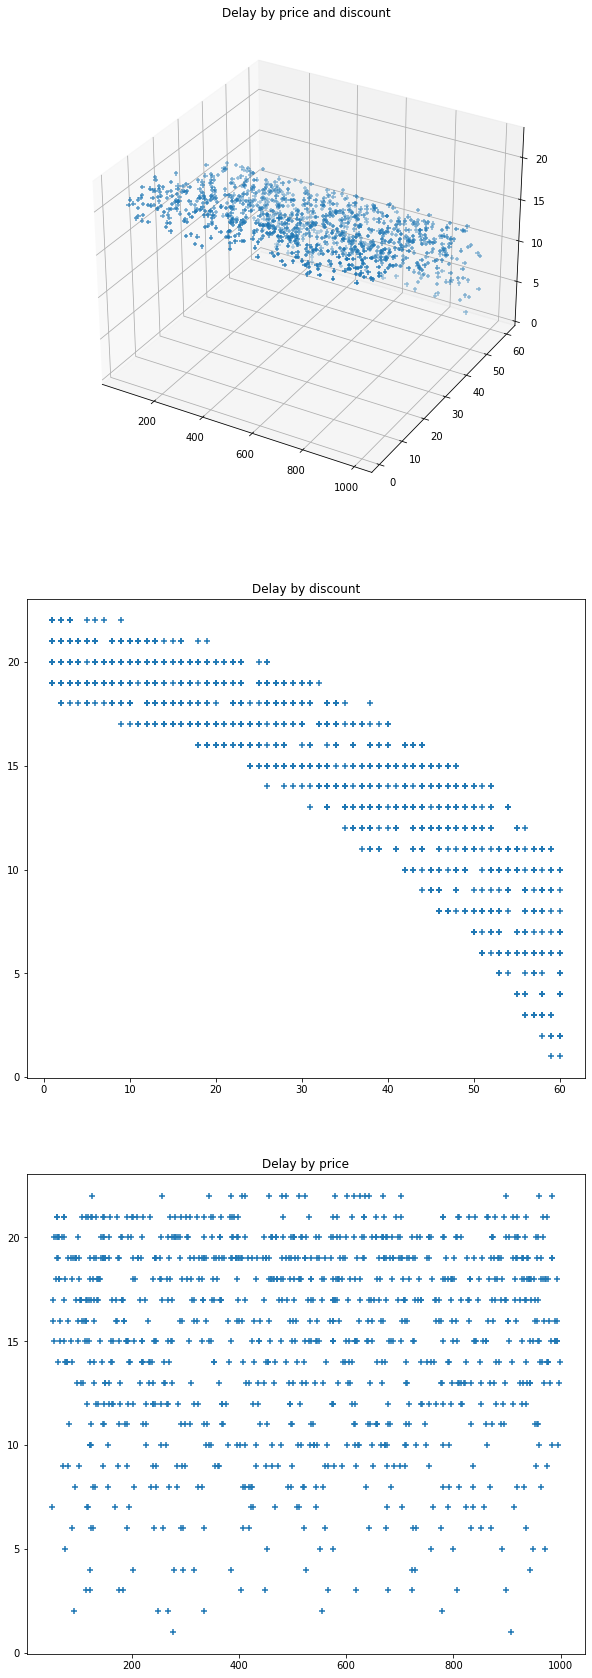

In [4]:
fig = plot.figure(figsize=(10,30))
chart3D = fig.add_subplot(3,1,1, projection="3d")
chart3D.scatter(Xtrain[:,0], Xtrain[:,1], Ytrain, marker = "+")
t=plot.title('Delay by price and discount')
discountChart = fig.add_subplot(3,1,2)
discountChart.scatter(Xtrain[:,1], Ytrain, marker = "+")
t=plot.title('Delay by discount')
initPriceChart = fig.add_subplot(3,1,3)
initPriceChart.scatter(Xtrain[:,0], Ytrain, marker = "+")
t=plot.title('Delay by price')

On constate que la remise seule pourrait expliquer la variation de prix, et la visualisation 3D ressemble d'ailleurs à un plan.

### Résolution de l'équation normale
Calculons le meilleur $\theta$

In [5]:
theta = solve_model(Xtrain, Ytrain)
print("Theta: " + str(theta.T))

Theta: [[ 2.22240863e+01  5.65449585e-05 -2.34505409e-01]]


Et pour finir, quelques prédictions :

In [6]:
def prediction(prix_neuf, prix_annonce, model):
    return np.dot(np.array([1, prix_neuf, prix_annonce]).T, model)[0]

test_set = np.array([[100,100], [1000,1000], [100,1000], [10,3], [50,23], [17,42], [1000,400], [1000,100]])
for test in test_set:
    print('Je souhaite vendre %i euros un article qui en vaut %i neuf : transaction possible sous %i jours' %(
        test[1],
        test[0],
        prediction(test[0], 100-100*test[1]/test[0], theta)))

Je souhaite vendre 100 euros un article qui en vaut 100 neuf : transaction possible sous 22 jours
Je souhaite vendre 1000 euros un article qui en vaut 1000 neuf : transaction possible sous 22 jours
Je souhaite vendre 1000 euros un article qui en vaut 100 neuf : transaction possible sous 233 jours
Je souhaite vendre 3 euros un article qui en vaut 10 neuf : transaction possible sous 5 jours
Je souhaite vendre 23 euros un article qui en vaut 50 neuf : transaction possible sous 9 jours
Je souhaite vendre 42 euros un article qui en vaut 17 neuf : transaction possible sous 56 jours
Je souhaite vendre 400 euros un article qui en vaut 1000 neuf : transaction possible sous 8 jours
Je souhaite vendre 100 euros un article qui en vaut 1000 neuf : transaction possible sous 1 jours


### Analyse des résultats

C'est plutôt convaincant. Vendre un article 10x plus cher va prendre 8 mois, vendre un article 10x moins cher va prendre une journée.

Il y a quand même plusieurs biais qui ne sont pas encore pris en compte : l'état de l'objet, le fait que les articles chers partent moins rapidement, etc... mais le jeu de données utilisé pour l'exemple était volontairement simpliste.

Accessoirement, le jeu de données était aussi prémaché. Le fait d'avoir le discount plutôt que le prix de vente est lié au fait que la résolution n'aurait pas été linéaire dans ce cas là, et donc pas adapté à ce type de problème. On y reviendra plus tard !

Une dernière constatation: les 3 composantes de $\theta$ : 
* $\theta_1$ est ridiculement faible (0,00005) : le prix initial semble ne pas compter beaucoup
* $\theta_0$ et $\theta_2$ indiquent une fonction affine : une durée de base qui décroit quand le discount augmente

### Note à propos de l'inversion de matrice

On est parti du principe que la matrice $X^T.X$ était inversible.
Ca n'est pas toujours le cas...

Par contre, dans les cas où on ne peut pas calculer l'inverse d'une matrice, on peut toujours calculer son pseudo-inverse, et la méthode décrite ici reste toujours valable.